<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-257_Machine_Learning/blob/main/%5BJocelyn_Baduria%5D_HW6_MLP_InteractiveVisualization_257_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Data Loading

In [202]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Import Libraries and Read the Data from CSV

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl

In [204]:
path = '/content/drive/My Drive/Underdog/data/Cleaned_Diameter_Asteroid_data.csv'

data = pd.read_csv(path, delimiter=',')

In [205]:
data.head()

name         a         e  ...         n          per          ma
0    Ceres  2.769165  0.076009  ...  0.213885  1683.145708   77.372096
1   Pallas  2.772466  0.230337  ...  0.213503  1686.155999   59.699133
2     Juno  2.669150  0.256942  ...  0.226019  1592.787285   34.925016
3    Vesta  2.361418  0.088721  ...  0.271609  1325.432765   95.861936
4  Astraea  2.574249  0.191095  ...  0.238632  1508.600458  282.366289

[5 rows x 23 columns]

In [206]:
data.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
diameter          float64
albedo            float64
rot_per           float64
moid              float64
class               int64
n                 float64
per               float64
ma                float64
dtype: object

In [207]:
# data['diameter'] = data['diameter'].astype(float) 
# data['condition_code'] = data['condition_code'].astype(float) 
# data['neo'] = data['neo'].astype('category').cat.codes
# data['pha'] = data['pha'].astype('category').cat.codes
# data['class'] = data['class'].astype('category').cat.codes
data['diameter'] = data['diameter'].astype(float) 
data['condition_code'] = data['condition_code'].astype(float) 
data['neo'] = data['neo'].astype(float)
data['pha'] = data['pha'].astype(float)
data['class'] = data['class'].astype(float)

## 2. Feature Importance
Data Narrative : Random Forest Feature Importance (MDI) and Permutation Importance got per_y as highest feature importance. 

Shap Values: Found the data_arc has the highest feature.

Choose the other features related to our project objective function


In [208]:
# Let's load the packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
# import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [209]:
# Load the data set and split for training and testing.
column_name=['a','e','i','om','w','q','ad','per_y','data_arc','condition_code','n_obs_used','H','neo','pha','diameter','albedo','rot_per',
                                'moid','class','n','per','ma']
X = pd.DataFrame(data, columns=column_name) 
y = pd.DataFrame(data, columns=column_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [210]:
X, y

(             a         e          i  ...         n          per          ma
 0     2.769165  0.076009  10.594067  ...  0.213885  1683.145708   77.372096
 1     2.772466  0.230337  34.836234  ...  0.213503  1686.155999   59.699133
 2     2.669150  0.256942  12.988919  ...  0.226019  1592.787285   34.925016
 3     2.361418  0.088721   7.141771  ...  0.271609  1325.432765   95.861936
 4     2.574249  0.191095   5.366988  ...  0.238632  1508.600458  282.366289
 ...        ...       ...        ...  ...       ...          ...         ...
 5405  1.123117  0.214010  26.059847  ...  0.828069   434.746466  122.227258
 5406  2.536682  0.210917  12.961618  ...  0.243952  1475.697793  162.362861
 5407  2.676866  0.152296   6.417012  ...  0.225042  1599.699647  334.188693
 5408  0.864351  0.273428  13.248402  ...  1.226504   293.517284  189.605800
 5409  2.331445  0.218534  23.314698  ...  0.276864  1300.278239  181.191614
 
 [5410 rows x 22 columns],
              a         e          i  ...      

### Random Forest Gini Importance vs Permutation Importance

In [211]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
# import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [212]:
# Load the data set and split for training and testing.
column_name=['a','e','i','om','w','q','ad','per_y','data_arc','condition_code','n_obs_used','H','neo','pha','diameter','albedo','rot_per',
                                'moid','class','n','per','ma']
X = pd.DataFrame(data, columns=column_name) 
y = pd.DataFrame(data, columns=column_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [213]:
# Fit the Random Forest Regressor with 100 Decision Trees:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [214]:
# To get the feature importances from the Random Forest model use the feature_importances_ argument:
rf.feature_importances_

array([2.67209202e-03, 1.56042759e-04, 1.04747230e-04, 4.67291407e-05,
       1.10672308e-04, 1.87751830e-03, 8.14060650e-03, 4.74283944e-03,
       9.60446628e-01, 2.64266679e-03, 1.98974887e-03, 1.11210684e-03,
       1.75063377e-05, 3.24465496e-06, 3.10760741e-03, 1.30052806e-04,
       1.10193316e-04, 3.58893742e-03, 1.23550020e-03, 4.19902596e-03,
       3.35694381e-03, 2.08590213e-04])

In [215]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rf.feature_importances_)
tree_indices = np.arange(0, len(rf.feature_importances_)) + 0.5

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually

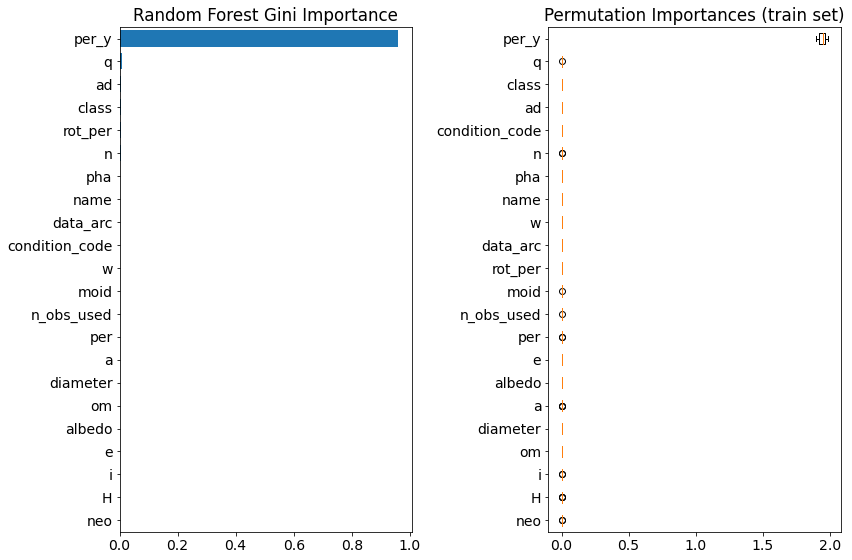

In [216]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         rf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(data.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(rf.feature_importances_)))
ax1.set_title("Random Forest Gini Importance")
ax2.set_title("Permutation Importances (train set)")
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=data.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

### Using Shap Values Feature Importance


In [217]:
!pip install shap

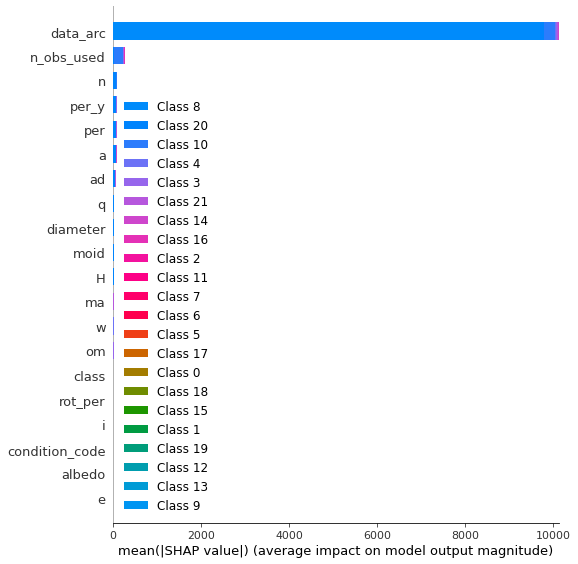

In [223]:
# Feature importance using Training sample
import shap
# model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
# model.fit(X_train, y_train)
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

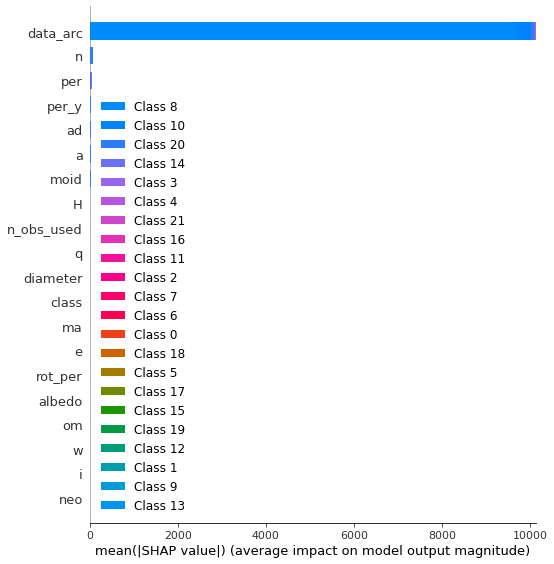

In [221]:
# Feature importance using Test sample
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_test)
f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

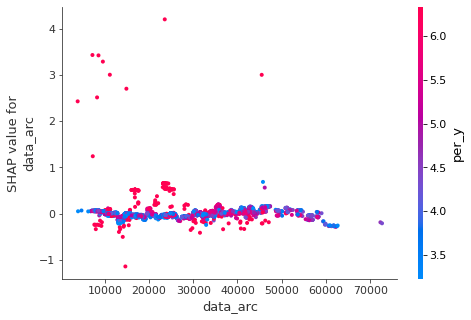

In [222]:
shap.dependence_plot('data_arc', shap_values[0], X_train)

##3. Sampling Distribution

> diameter - ('Original data', (5410, 22), 'Up Sample', (9119, 1), 'Down Sample', (4344, 1))

> rot_per - ('Original data', (5410, 1), 'Up Sample', (9137, 1), 'Down Sample', (4424, 1))






In [20]:
# Install SMOGN
!pip install smogn

In [183]:
# Use this data for sampling
X1 = data[['diameter']] 
y1 = data[['rot_per']]

## Before Sampling Distribution original Diameter and rotation data 

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


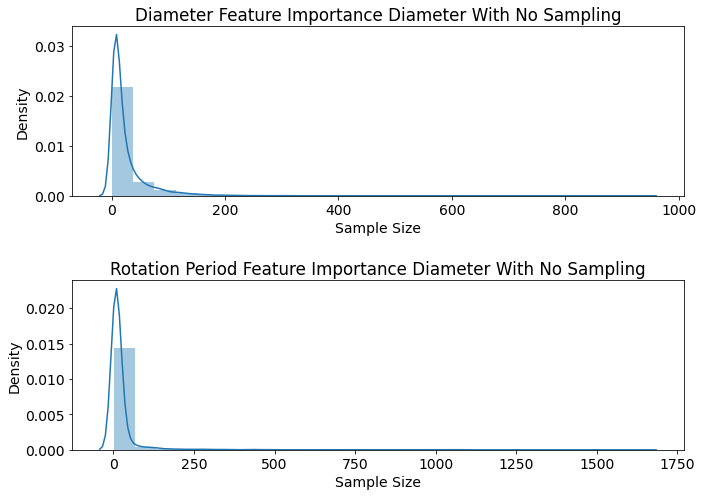

In [22]:
# Before Sampling Feature Importance Distribution 
import matplotlib.pyplot as plt
import seaborn as sns

# X = data[['diameter']] 
_ = plt.figure(figsize=(10,7))
ax1 = plt.subplot(211)
g = sns.distplot(data.diameter, bins=25, kde=True)

plt.title('Diameter Feature Importance Diameter With No Sampling')
plt.ylabel('Density')
plt.xlabel('Sample Size')

ax2 = plt.subplot(212)
g = sns.distplot(data.rot_per, bins=25, kde=True)

plt.title('Rotation Period Feature Importance Diameter With No Sampling')
plt.ylabel('Density')
plt.xlabel('Sample Size')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

## Down Sampling Distribution Diameter and rotation data 


In [24]:
# Down Sampling ( first run detect missing value, second run - ok)
# The extreme values are considered rare "minorty" values are over-sampled. 
# The values closer the median are considered "majority" values and are under-sampled.
import smogn
## conduct smogn
feature_dia = smogn.smoter(
    
    data = X1,  ## pandas dataframe
    y = 'diameter'  ## string ('header name')
)

r_index: 100%|##########| 573/573 [00:00<00:00, 727.69it/s]


In [25]:
# Down Sampling
# The extreme values are considered rare "minorty" values are over-sampled. 
# The values closer the median are considered "majority" values and are under-sampled.
import smogn
## conduct smogn
feature_rot_per = smogn.smoter(
    
    data = y1,  ## pandas dataframe
    y = 'rot_per'  ## string ('header name')
)

r_index: 100%|##########| 734/734 [00:00<00:00, 746.17it/s]


In [26]:
feature_dia.shape

(4344, 1)

In [27]:
feature_rot_per.shape

(4424, 1)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


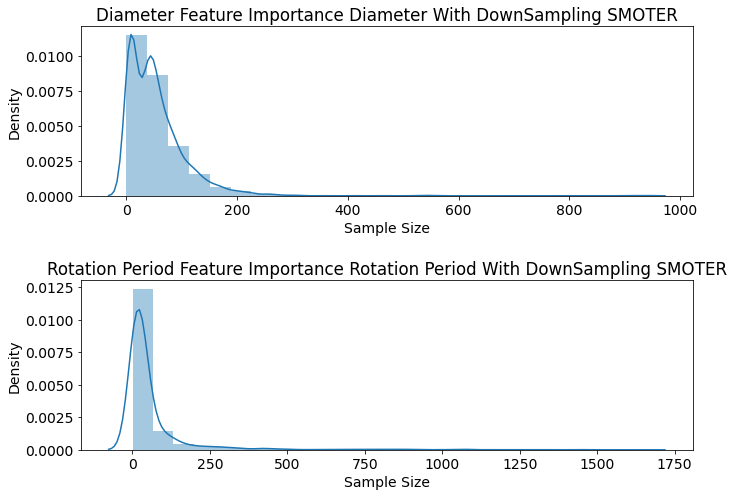

In [28]:
# g = sns.distplot(feature_smogn, bins=25, kde=True)
# g.figure.set_size_inches(10,7)
# plt.title('Feature Importance Diameter With DownSampling SMOTER')
# plt.ylabel('Density')
# plt.xlabel('Sample Size')

# After Sampling Feature Importance Distribution 
import matplotlib.pyplot as plt
import seaborn as sns

# X = data[['diameter']] 
_ = plt.figure(figsize=(10,7))
ax1 = plt.subplot(211)
g = sns.distplot(feature_dia, bins=25, kde=True)

plt.title('Diameter Feature Importance Diameter With DownSampling SMOTER')
plt.ylabel('Density')
plt.xlabel('Sample Size')

ax2 = plt.subplot(212)
g = sns.distplot(feature_rot_per, bins=25, kde=True)

plt.title('Rotation Period Feature Importance Rotation Period With DownSampling SMOTER')
plt.ylabel('Density')
plt.xlabel('Sample Size')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

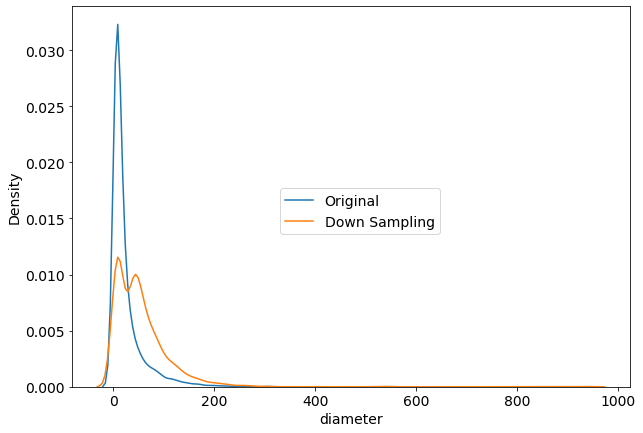

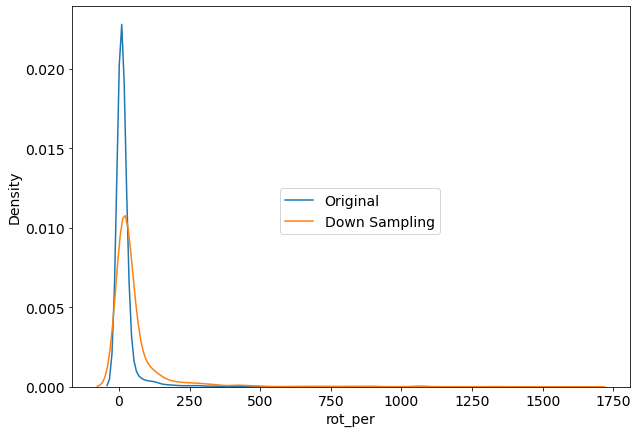

<Figure size 864x576 with 0 Axes>

In [29]:
## plot y distribution 
fig = plt.figure(figsize=(10,7))

sns.kdeplot(X['diameter'], label = "Original")
sns.kdeplot(feature_dia['diameter'], label = "Down Sampling")
fig.legend(labels=['Original', 'Down Sampling'], loc='upper center', bbox_to_anchor=(0.5, 0.5))
plt.show()

fig = plt.figure(figsize=(10,7))
sns.kdeplot(y1['rot_per'], label = "Original")
sns.kdeplot(feature_rot_per['rot_per'], label = "Down Sampling")
fig.legend(labels=['Original', 'Down Sampling'], loc='upper center', bbox_to_anchor=(0.5, 0.5))
plt.show()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

## Up Sampling Distribution Diamtere and rotation data

In [30]:
# Up Sampling
## conduct smogn
feature_dia1 = smogn.smoter(
    
    ## main arguments
    data = X1,           ## pandas dataframe
    y = 'diameter',          ## string ('header name')
    k = 9,                    ## positive integer (k < n)

    # If 'extreme' is specified, more over/under-sampling is conducted. 
    # In this case, we input 'extreme' (default is 'balance') to aggressively over/under-sample with the following input: samp_method = 'extreme'
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    ## https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_2_int.ipynb

    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25           ## positive real number (0 < R)
)

r_index: 100%|##########| 492/492 [00:00<00:00, 732.62it/s]


In [31]:
# Up Sampling
## conduct smogn
feature1_rot_per = smogn.smoter(
    
    ## main arguments
    data = y1,           ## pandas dataframe
    y = 'rot_per',          ## string ('header name')
    k = 9,                    ## positive integer (k < n)

    # If 'extreme' is specified, more over/under-sampling is conducted. 
    # In this case, we input 'extreme' (default is 'balance') to aggressively over/under-sample with the following input: samp_method = 'extreme'
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    ## https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_2_int.ipynb

    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25           ## positive real number (0 < R)
)

synth_matrix: 100%|##########| 601/601 [00:05<00:00, 108.81it/s]


In [32]:
feature_dia1.shape

(9119, 1)

In [33]:
feature1_rot_per.shape

(9137, 1)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


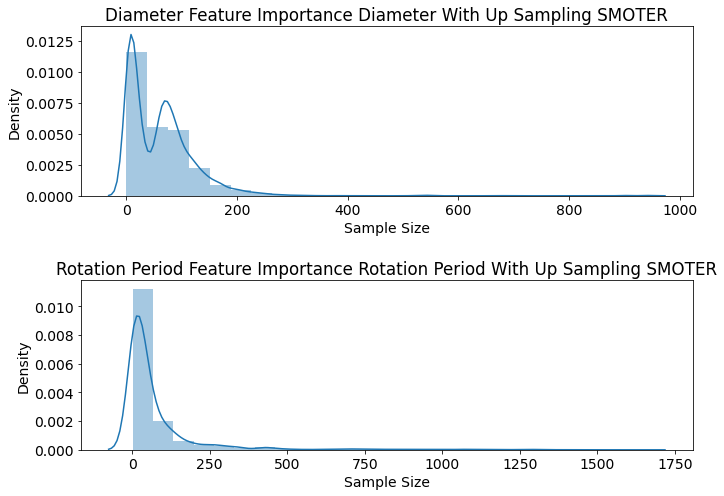

In [34]:
# After Sampling Feature Importance Distribution 
import matplotlib.pyplot as plt
import seaborn as sns

# X = data[['diameter']] 
_ = plt.figure(figsize=(10,7))
ax1 = plt.subplot(211)
g = sns.distplot(feature_dia1, bins=25, kde=True)

plt.title('Diameter Feature Importance Diameter With Up Sampling SMOTER')
plt.ylabel('Density')
plt.xlabel('Sample Size')

ax2 = plt.subplot(212)
g = sns.distplot(feature1_rot_per, bins=25, kde=True)

plt.title('Rotation Period Feature Importance Rotation Period With Up Sampling SMOTER')
plt.ylabel('Density')
plt.xlabel('Sample Size')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

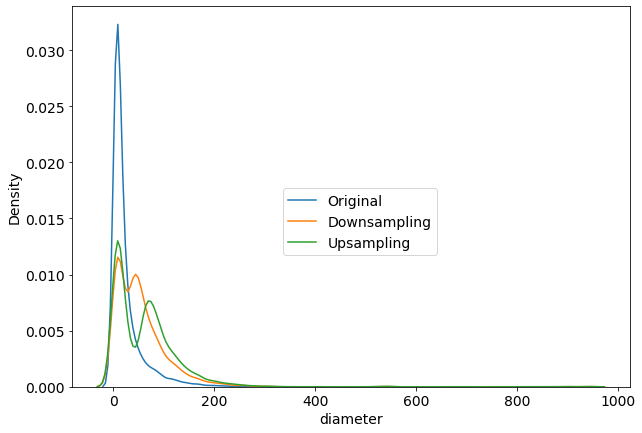

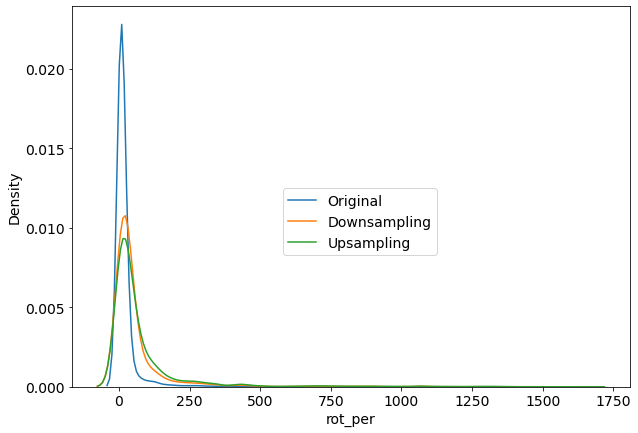

<Figure size 864x576 with 0 Axes>

In [36]:
## plot y distribution 
fig = plt.figure(figsize=(10,7))

sns.kdeplot(X['diameter'], label = "Original")
sns.kdeplot(feature_dia['diameter'], label = "Downsampling")
sns.kdeplot(feature_dia1['diameter'], label = "Upsampling")
fig.legend(labels=['Original', 'Downsampling','Upsampling'], loc='upper center', bbox_to_anchor=(0.5, 0.5))
plt.show()

fig = plt.figure(figsize=(10,7))
sns.kdeplot(y1['rot_per'], label = "Original")
sns.kdeplot(feature_rot_per['rot_per'], label = "Downsampling")
sns.kdeplot(feature1_rot_per['rot_per'], label = "Upsampling")
fig.legend(labels=['Original', 'Downsampling', 'Upsampling'], loc='upper center', bbox_to_anchor=(0.5, 0.5))
plt.show()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

## Sampling Size Summary

In [227]:


table = ('Original data', X1.shape, 'Up Sample', feature_dia1.shape, 'Down Sample', feature_dia.shape)

table1 = ('Original data', y1.shape, 'Up Sample', feature1_rot_per.shape, 'Down Sample', feature_rot_per.shape)

display(table)
display(table1)

('Original data', (5410, 1), 'Up Sample', (9119, 1), 'Down Sample', (4344, 1))

('Original data', (5410, 1), 'Up Sample', (9137, 1), 'Down Sample', (4424, 1))

## Data Summary to be used in Muller Loop 

In [184]:
X1 = X1 # Original
X2 = feature_dia1 # Upsampled
X3 = feature_dia # Downsampled
y1 = y1 # Original
y2 = feature1_rot_per # Upsampled
y3 = feature_rot_per # Downsampled

In [185]:
# Convert the rot_per data for target value to int not accepting float value
y1 = y1.astype(int)
y2 = y2.astype(int)
y3 = y3.astype(int)
# to_remove excess rows
y2 = (y2[:9119])
y3 = (y3[:4344])

In [186]:
# check y2 and y3 should equal to diameter downsample and upsample rows to be use in Muller loop 
print(y2.shape)
y3.shape

(9119, 1)


(4344, 1)

##4. Muller Loop Classifier Feature Importance

> Original data -> Best --> Classifier = AdaBoost, Score (test, accuracy) = 13.37

> Upsample -> Best --> Classifier = RandomForestClassifier, Score (test, accuracy) = 0.18

> Downsample -> Best --> Classifier = RandomForestClassifier, Score (test, accuracy) = 0.17

Original Diameter Feature - No Sampling

In [233]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [234]:
from sklearn.model_selection import train_test_split
import time
# scaler = StandardScaler()
# X1 = scaler.fit_transform(X1)
# y1 = data[['rot_per']] 


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)

#second error need to convert column vector y to an 1D array as expected for training one feature, error was fix
y_train = y_train.values.ravel()

# First error
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
# X_train= X_train.reshape(-1, 1)
# y_train= y_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

names = ["Gradient Boosting","Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, solver='adam', max_iter=1000),
    AdaBoostClassifier(),
    ]

output = pd.DataFrame(columns=['classifier','mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):

    start_time = time.process_time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    score = 100.0 * clf.score(X_test, y_test)

    # score = metrics.accuracy_score(y_test, y_predict)
  
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name,'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
   
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Classifier = Gradient Boosting, Score (test, accuracy) = 2.77
Classifier = Nearest Neighbors, Score (test, accuracy) = 8.75
Classifier = Linear SVM, Score (test, accuracy) = 13.12
Classifier = RBF SVM, Score (test, accuracy) = 12.08
Classifier = Decision Tree, Score (test, accuracy) = 13.06
Classifier = Random Forest, Score (test, accuracy) = 12.82
Classifier = Neural Net, Score (test, accuracy) = 12.63
Classifier = AdaBoost, Score (test, accuracy) = 13.37
--------------------------------------------------------------------------------
Best --> Classifier = AdaBoost, Score (test, accuracy) = 13.37


In [235]:
display(output)

classifier    mae       mse  Rsquared   accuracy
0  Gradient Boosting  81.09  16751.33     -1.92   2.772643
1  Nearest Neighbors  18.66   6041.83     -0.05   8.749230
2         Linear SVM  18.26   6055.76     -0.06  13.123845
3            RBF SVM  17.80   6032.87     -0.05  12.076402
4      Decision Tree  17.82   6034.05     -0.05  13.062230
5      Random Forest  17.83   6030.25     -0.05  12.815773
6         Neural Net  17.96   6042.45     -0.05  12.630930
7           AdaBoost  17.53   6009.22     -0.05  13.370302

In [237]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       107
           3       0.17      0.84      0.28       195
           4       0.00      0.00      0.00       127
           5       0.16      0.07      0.10       143
           6       0.00      0.00      0.00       117
           7       0.00      0.00      0.00       103
           8       0.00      0.00      0.00        86
           9       0.07      0.51      0.13        87
          10       0.00      0.00      0.00        55
          11       0.00      0.00      0.00        64
          12       0.00      0.00      0.00        60
          13       0.00      0.00      0.00        42
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        32
          16       0.00      0.00      0.00        25
          17       0.00      0.00      0.00        27
          18       0.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Up Sample

In [238]:
from sklearn.model_selection import train_test_split
import time
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = data[['rot_per']] 


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30)

#second error need to convert column vector y to an 1D array as expected for training one feature
y_train = y_train.values.ravel()

# names = ["Decision Tree", "MLP Neural Net"]
names = ["Decision Tree", "MLP Neural Net", "RandomForestClassifier"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(solver='adam',alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ]
output = pd.DataFrame(columns=['classifier','mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):

    start_time = time.process_time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    score = 100.0 * clf.score(X_test, y_test)

    score = metrics.accuracy_score(y_test, y_predict)
  
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name,'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
   
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Classifier = Decision Tree, Score (test, accuracy) = 0.13
Classifier = MLP Neural Net, Score (test, accuracy) = 0.11
Classifier = RandomForestClassifier, Score (test, accuracy) = 0.17
--------------------------------------------------------------------------------
Best --> Classifier = RandomForestClassifier, Score (test, accuracy) = 0.17


In [239]:
display(output)

classifier    mae       mse  Rsquared  accuracy
0           Decision Tree  58.05  28480.47     -0.03  0.133041
1          MLP Neural Net  46.93  25099.10      0.09  0.111111
2  RandomForestClassifier  57.51  28359.04     -0.02  0.165936

In [173]:
# print("accuracy:   %0.3f" % score)
print(metrics.classification_report(y_test, y_predict))
# metrics.plot_roc_curve(clf, X_test, y_test)
# plt.show()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        96
           3       0.13      0.66      0.22       170
           4       0.12      0.26      0.16       120
           5       0.11      0.11      0.11       133
           6       0.06      0.01      0.02       115
           7       0.00      0.00      0.00        93
           8       0.08      0.02      0.03        57
           9       0.18      0.03      0.05        65
          10       0.00      0.00      0.00        54
          11       0.00      0.00      0.00        43
          12       0.00      0.00      0.00        51
          13       0.00      0.00      0.00        36
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        34
          16       0.00      0.00      0.00        30
          17       0.00      0.00      0.00        22
          18       0.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Down Sample

In [240]:
from sklearn.model_selection import train_test_split
import time
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = data[['rot_per']] 


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30)

#second error need to convert column vector y to an 1D array as expected for training one feature
y_train = y_train.values.ravel()

# names = ["Decision Tree", "MLP Neural Net"]
names = ["Decision Tree", "MLP Neural Net", "RandomForestClassifier"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(solver='adam',alpha=1, max_iter=1000),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ]
output = pd.DataFrame(columns=['classifier','mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):

    start_time = time.process_time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    score = 100.0 * clf.score(X_test, y_test)

    score = metrics.accuracy_score(y_test, y_predict)
  
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name,'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
   
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Classifier = Decision Tree, Score (test, accuracy) = 0.15
Classifier = MLP Neural Net, Score (test, accuracy) = 0.11
Classifier = RandomForestClassifier, Score (test, accuracy) = 0.18
--------------------------------------------------------------------------------
Best --> Classifier = RandomForestClassifier, Score (test, accuracy) = 0.18


In [241]:
display(output)

classifier    mae       mse  Rsquared  accuracy
0           Decision Tree  58.05  28715.38      0.01  0.146930
1          MLP Neural Net  49.57  26695.64      0.08  0.110015
2  RandomForestClassifier  56.74  28818.19      0.01  0.181652

In [242]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        97
           3       0.12      0.79      0.20       146
           4       0.08      0.09      0.08       134
           5       0.06      0.03      0.04       146
           6       0.00      0.00      0.00       114
           7       0.03      0.01      0.01        99
           8       0.00      0.00      0.00        80
           9       0.00      0.00      0.00        71
          10       0.00      0.00      0.00        52
          11       0.50      0.02      0.03        56
          12       0.00      0.00      0.00        42
          13       0.00      0.00      0.00        36
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        24
          17       0.00      0.00      0.00        27
          18       0.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


##5. Muller Loop Regression Feature Importance
> Original data -> Best --> Regression = MLP, Score (accuracy) = 0.04

> Upsample -> Best --> Regression = Random Forest, Score (accuracy) = 13.66

> Downsample -> Best --> Regression = MLP, Score (accuracy) = 0.30

In [188]:
from sklearn import metrics
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)
y_train = y_train.values.ravel()
names = ["Nearest Neighbors", "Linear SVR", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost"
         ]

regression = [
    KNeighborsRegressor(2),
    SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1),
    GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None),
    DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1500),
    AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    # GaussianNB()]
    # QuadraticDiscriminantAnalysis()
    ]
output = pd.DataFrame(columns=['regressor', 'mae', 'mse', 'Rsquared', 'accuracy'])

In [189]:
import time

max_score = 0.0
max_class = ''
# iterate over regressor
for name, clf in zip(names, regression):
    start_time = time.process_time()
    clf.fit(X_train, y_train)
  
    score = 100.0 * clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)

    
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'regressor': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)

    # print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
    # print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
    # print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
    # print('Regression = %s, Score (accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds,'%(time.process_time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name
print(output)
print(80*'-' )
print('Best --> Regression = %s, Score (accuracy) = %.2f' %(max_class, max_score))

           regressor    mae        mse  Rsquared     accuracy
0  Nearest Neighbors  30.10    8285.15     -0.57   -56.587771
1         Linear SVR  18.14    5544.57     -0.05    -4.791314
2   Gaussian Process  53.80  178111.76    -32.66 -3266.276932
3      Decision Tree  30.09    9288.97     -0.76   -75.559754
4      Random Forest  25.88    5504.82     -0.04    -4.039959
5                MLP  25.84    5288.80      0.00     0.042824
6           AdaBoost  58.82    8117.24     -0.53   -53.414198
--------------------------------------------------------------------------------
Best --> Regression = MLP, Score (accuracy) = 0.04


In [190]:
display(output)

regressor    mae        mse  Rsquared     accuracy
0  Nearest Neighbors  30.10    8285.15     -0.57   -56.587771
1         Linear SVR  18.14    5544.57     -0.05    -4.791314
2   Gaussian Process  53.80  178111.76    -32.66 -3266.276932
3      Decision Tree  30.09    9288.97     -0.76   -75.559754
4      Random Forest  25.88    5504.82     -0.04    -4.039959
5                MLP  25.84    5288.80      0.00     0.042824
6           AdaBoost  58.82    8117.24     -0.53   -53.414198

Up Sample Muller Loop

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30)
y_train = y_train.values.ravel()
names = ["Nearest Neighbors", "Linear SVR", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost"
         ]

regression = [
    KNeighborsRegressor(2),
    SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1),
    GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None),
    DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1500),
    AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    # GaussianNB()]
    # QuadraticDiscriminantAnalysis()
    ]
output = pd.DataFrame(columns=['regressor', 'mae', 'mse', 'Rsquared', 'accuracy'])

In [192]:
import time

max_score = 0.0
max_class = ''
# iterate over regressor
for name, clf in zip(names, regression):
    start_time = time.process_time()
    clf.fit(X_train, y_train)
  
    score = 100.0 * clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)

    
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'regressor': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)

    # print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
    # print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
    # print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
    # print('Regression = %s, Score (accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds,'%(time.process_time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name
print(output)
print(80*'-' )
print('Best --> Regression = %s, Score (accuracy) = %.2f' %(max_class, max_score))

           regressor     mae           mse  Rsquared      accuracy
0  Nearest Neighbors   74.28  3.129483e+04     -0.34 -3.388350e+01
1         Linear SVR   41.60  2.093686e+04      0.10  1.042928e+01
2   Gaussian Process  922.36  3.267725e+08 -13978.77 -1.397877e+06
3      Decision Tree   75.81  4.234680e+04     -0.81 -8.116534e+01
4      Random Forest   63.93  2.018087e+04      0.14  1.366353e+01
5                MLP   63.46  2.030146e+04      0.13  1.314759e+01
6           AdaBoost  215.11  6.163705e+04     -1.64 -1.636916e+02
--------------------------------------------------------------------------------
Best --> Regression = Random Forest, Score (accuracy) = 13.66


In [193]:
display(output)

regressor     mae           mse  Rsquared      accuracy
0  Nearest Neighbors   74.28  3.129483e+04     -0.34 -3.388350e+01
1         Linear SVR   41.60  2.093686e+04      0.10  1.042928e+01
2   Gaussian Process  922.36  3.267725e+08 -13978.77 -1.397877e+06
3      Decision Tree   75.81  4.234680e+04     -0.81 -8.116534e+01
4      Random Forest   63.93  2.018087e+04      0.14  1.366353e+01
5                MLP   63.46  2.030146e+04      0.13  1.314759e+01
6           AdaBoost  215.11  6.163705e+04     -1.64 -1.636916e+02

Down Sample Muller Loop

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.30)
y_train = y_train.values.ravel()
names = ["Nearest Neighbors", "Linear SVR", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost"
         ]

regression = [
    KNeighborsRegressor(2),
    SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1),
    GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None),
    DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1500),
    AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    # GaussianNB()]
    # QuadraticDiscriminantAnalysis()
    ]
output = pd.DataFrame(columns=['regressor', 'mae', 'mse', 'Rsquared', 'accuracy'])

In [199]:
import time

max_score = 0.0
max_class = ''
# iterate over regressor
for name, clf in zip(names, regression):
    start_time = time.process_time()
    clf.fit(X_train, y_train)
  
    score = 100.0 * clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)

    
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'regressor': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)

    # print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
    # print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
    # print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
    # print('Regression = %s, Score (accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds,'%(time.process_time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name
print(output)
print(80*'-' )
print('Best --> Regression = %s, Score (accuracy) = %.2f' %(max_class, max_score))

           regressor     mae           mse  Rsquared      accuracy
0  Nearest Neighbors   68.02  2.486981e+04     -0.41 -4.057158e+01
1         Linear SVR   43.54  1.815803e+04     -0.03 -2.634628e+00
2   Gaussian Process  959.21  2.175714e+08 -12296.78 -1.229678e+06
3      Decision Tree   72.72  3.383005e+04     -0.91 -9.121751e+01
4      Random Forest   58.05  1.854820e+04     -0.05 -4.839963e+00
5                MLP   59.06  1.763900e+04      0.00  2.990984e-01
6           AdaBoost   84.73  1.993489e+04     -0.13 -1.267794e+01
--------------------------------------------------------------------------------
Best --> Regression = MLP, Score (accuracy) = 0.30


In [200]:
display(output)

regressor     mae           mse  Rsquared      accuracy
0  Nearest Neighbors   68.02  2.486981e+04     -0.41 -4.057158e+01
1         Linear SVR   43.54  1.815803e+04     -0.03 -2.634628e+00
2   Gaussian Process  959.21  2.175714e+08 -12296.78 -1.229678e+06
3      Decision Tree   72.72  3.383005e+04     -0.91 -9.121751e+01
4      Random Forest   58.05  1.854820e+04     -0.05 -4.839963e+00
5                MLP   59.06  1.763900e+04      0.00  2.990984e-01
6           AdaBoost   84.73  1.993489e+04     -0.13 -1.267794e+01

##6. Install MiniConda

In [ ]:
!which python # should return /usr/local/bin/python
!python --version
!echo $PYTHONPATH
%env PYTHONPATH=

/usr/local/bin/python
Python 3.7.10
/env/python
env: PYTHONPATH=


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-03-16 03:04:13--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-03-16 03:04:13--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 39.1M 1s
    50K .......... .......... .......... .......... ..........  0%

In [ ]:
!which conda

/usr/local/bin/conda


In [ ]:
!conda --version

conda 4.5.4


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    urllib3-1.26.3             |     pyhd3eb1b0_0          99 KB
    libffi-3.3                 |       he6710b0_2          54 KB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    libstdcxx-ng-9.1.0         |       hdf63c60_0         4.0 MB
    readline-8.1               |       h27cfd23_0         464 KB
    pip-21.0.1                 |   py36h06a4308_0         2.0 MB
    pyopenssl-20.0.1           |     pyhd3eb1b0_1          48 KB
    yaml-0.2.5                 |       h7b6447c_0          87 KB
    conda-package-handling-1.7.2|   py36h03888b9_0         967 KB
    tk-8.6.10                  |       hbc83047_0         3.2 MB
    cffi-1.14.5                |   py36h261ae71_0  

urllib3-1.26.3       |   99 KB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
readline-8.1         |  464 KB | ########## | 100% 
pip-21.0.1           |  2.0 MB | ########## | 100% 
pyopenssl-20.0.1     |   48 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
conda-package-handli |  967 KB | ########## | 100% 
tk-8.6.10            |  3.2 MB | ########## | 100% 
cffi-1.14.5          |  224 KB | ########## | 100% 
ruamel_yaml-0.15.87  |  256 KB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
chardet-4.0.0        |  213 KB | ########## | 100% 
_libgcc_mutex-0.1    |    3 KB | ########## | 100% 
wheel-0.36.2         |   31 KB | ########## | 100% 
python-3.6.13        | 33.9 MB | ########## | 100% 
sqlite-3.35.0        |  1.4 MB | ########## | 100% 
idna-2.10            |   52 KB | ########## | 100% 
ncurses-6.2 

In [ ]:
!conda --version

conda 4.9.2


In [ ]:
!python --version

Python 3.6.13 :: Anaconda, Inc.


Append to the sys path

In [ ]:
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
!ls /usr/local/lib/python3.6/dist-packages

In [ ]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

In [ ]:
!conda install --channel conda-forge featuretools --yes

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - featuretools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bokeh-1.4.0                |   py36h9f0ad1d_1        13.5 MB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    cloudpickle-1.6.0          |             py_0          22 KB  conda-forge
    conda-4.9.2                |   py36h5fab9bb_0         3.0 MB  conda-forge
    contextvars-2.4            |             py_0          11 KB  conda-forge
    cytoolz-0.11.0           

##7. Setup the Holoviz

In [ ]:
!conda create -n holoviz-tutorial python=3.7

Solving environment: | done

## Package Plan ##

  environment location: /usr/local/envs/holoviz-tutorial

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB
    ca-certificates-2021.1.19  |       h06a4308_1         118 KB
    certifi-2020.12.5          |   py37h06a4308_0         141 KB
    ld_impl_linux-64-2.33.1    |       h53a641e_7         568 KB
    libffi-3.3                 |       he6710b0_2          50 KB
    libgcc-ng-9.1.0            |       hdf63c60_0         5.1 MB
    libstdcxx-ng-9.1.0         |       hdf63c60_0         3.1 MB
    ncurses-6.2                |       he6710b0_1         817 KB
    openssl-1.1.1j             |       h27cfd23_0         2.5 MB
    pip-21.0.1                 |   py37h06a4308_0         1.8 MB
    python-3.7.10              |       hdb3f193_0    

In [ ]:
!conda install -c pyviz holoviz

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [ ]:
!holoviz examples

Copied examples to /content/holoviz-examples
Fetching data defined in /content/holoviz-examples/datasets.yml and placing in /content/holoviz-examples/data
[################################] 159865/159865 - 00:00:04
[################################] 13212/13212 - 00:00:00


In [ ]:
!cd holoviz-examples

In [ ]:
import datashader as ds, bokeh, holoviews as hv  # noqa
from distutils.version import LooseVersion

min_versions = dict(ds='0.11.0', bokeh='2.0.1', hv='1.13.2')

for lib, ver in min_versions.items():
    v = globals()[lib].__version__
    if LooseVersion(v) < LooseVersion(ver):
        print("Error: expected {}={}, got {}".format(lib,ver,v))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
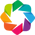

In [ ]:
hv.extension('bokeh', 'matplotlib')

In [ ]:
import os
if not os.path.isfile('../data/earthquakes.parq'):
    print('Earthquakes dataset not found; please run "holoviz fetch-data --path ..".')

Earthquakes dataset not found; please run "holoviz fetch-data --path ..".


In [ ]:
from pyct import cmd
if not os.path.isfile('../data/earthquakes.parq'):
    cmd.fetch_data(name='holoviz', path='..')

Fetching data defined in /usr/local/lib/python3.6/site-packages/holoviz/examples/datasets.yml and placing in /data


In [ ]:
try:
    import dask.dataframe as dd
    columns = ['depth', 'id', 'latitude', 'longitude', 'mag', 'place', 'time', 'type']
    data = dd.read_parquet('../data/earthquakes.parq', columns=columns, engine='fastparquet')
    data.head()
except RuntimeError:
    print('SNAPPY is missing, so data cannot be read. If you are pip installing, '
          'follow the steps here: https://github.com/andrix/python-snappy#dependencies')

SNAPPY is missing, so data cannot be read. If you are pip installing, follow the steps here: https://github.com/andrix/python-snappy#dependencies


In [ ]:
!conda install python-snappy

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python-snappy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h06a4308_0         140 KB
    conda-4.9.2                |   py36h06a4308_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.12.5-py36h5~ --> pkgs/main::certifi-2020.12.5-py36h06a4308_0
  conda              conda-forge::conda-4.9.2-py36h5fab9bb~ --> pkgs/main::conda-4.9.2-py36h06a4308_0


Proceed ([y]/n)?

In [ ]:
try:
    import dask.dataframe as dd
    columns = ['depth', 'id', 'latitude', 'longitude', 'mag', 'place', 'time', 'type']
    data = dd.read_parquet('../data/earthquakes.parq', columns=columns, engine='fastparquet')
    data.head()
except RuntimeError:
    print('SNAPPY is missing, so data cannot be read. If you are pip installing, '
          'follow the steps here: https://github.com/andrix/python-snappy#dependencies')

SNAPPY is missing, so data cannot be read. If you are pip installing, follow the steps here: https://github.com/andrix/python-snappy#dependencies


In [ ]:
!conda init

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.6/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



In [ ]:
!conda install datashader

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - datashader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    datashader-0.11.1          |             py_0        13.8 MB
    ------------------------------------------------------------
                                           Total:        13.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  datashader                  pyviz::datashader-0.12.1-py_0 --> pkgs/main::datashader-0.11.1-py_0


Proceed ([y]/n)? y


datashader-0.11.1    | 13.8 MB   | : 100% 1.0/1 [00:00<00:00,  2.17it/s]
Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / 

##8. Visualization 


In [ ]:
X1 = data[['diameter']] 
y1 = data[['rot_per']]

In [ ]:
X1 = X1
X2 = feature_dia1
X3 = feature_dia
y1 = y1
y2 = feature1_rot_per
y3 = feature_rot_per

y1 = y1.astype(int)
y2 = y2.astype(int)
y3 = y3.astype(int)

y2 = (y2[:9119])
y3 = (y3[:4344])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
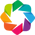

In [ ]:
import numpy as np
import numba as nb
import holoviews as hv
import panel as pn
import pandas as pd
from holoviews.operation.datashader import datashade, rasterize
from matplotlib import cm

hv.extension('bokeh', 'matplotlib')
pn.extension()

In [ ]:
# Load Training Data 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30)
y_train = y_train.values.ravel()